<a href="https://colab.research.google.com/github/sheriffdeenabu/DSPL-ICW/blob/main/w1985555_DSPL_ICW_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
#Read the CSV
fs_indicators = pd.read_csv('suite-of-food-security-indicators_lka.csv')

In [24]:
fs_indicators

,Iso3,StartDate,EndDate,Area Code,Area Code (M49),Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag,Note
0,#country+code,#date+start,#date+end,NaN,NaN,#country+name,#indicator+code,#indicator+name,NaN,NaN,NaN,#date+year,#indicator+type,#indicator+value+num,NaN,NaN
1,LKA,2000-01-01,2002-12-31,38.0,'144,Sri Lanka,21010,Average dietary energy supply adequacy (percen...,6121.0,Value,20002002.0,2002,%,102,E,NaN
2,LKA,2001-01-01,2003-12-31,38.0,'144,Sri Lanka,21010,Average dietary energy supply adequacy (percen...,6121.0,Value,20012003.0,2003,%,103,E,NaN
3,LKA,2002-01-01,2004-12-31,38.0,'144,Sri Lanka,21010,Average dietary energy supply adequacy (percen...,6121.0,Value,20022004.0,2004,%,103,E,NaN
4,LKA,2003-01-01,2005-12-31,38.0,'144,Sri Lanka,21010,Average dietary energy supply adequacy (percen...,6121.0,Value,20032005.0,2005,%,104,E,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,LKA,2016-01-01,2018-12-31,38.0,'144,Sri Lanka,21061,Average fat supply (g/cap/day) (3-year average),6123.0,Value,20162018.0,2018,g/cap/d,44.2,E,NaN
1077,LKA,2017-01-01,2019-12-31,38.0,'144,Sri Lanka,21061,Average fat supply (g/cap/day) (3-year average),6123.0,Value,20172019.0,2019,g/cap/d,45,E,NaN
1078,LKA,2018-01-01,2020-12-31,38.0,'144,Sri Lanka,21061,Average fat supply (g/cap/day) (3-year average),6123.0,Value,20182020.0,2020,g/cap/d,46.3,E,NaN
1079,LKA,2019-01-01,2021-12-31,38.0,'144,Sri Lanka,21061,Average fat supply (g/cap/day) (3-year average),6123.0,Value,20192021.0,2021,g/cap/d,47.6,E,NaN


In [25]:
fs_indicators.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1081 entries, 0 to 1080
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Iso3             1081 non-null   object 
 1   StartDate        1081 non-null   object 
 2   EndDate          1081 non-null   object 
 3   Area Code        1080 non-null   float64
 4   Area Code (M49)  1080 non-null   object 
 5   Area             1081 non-null   object 
 6   Item Code        1081 non-null   object 
 7   Item             1081 non-null   object 
 8   Element Code     1080 non-null   float64
 9   Element          1080 non-null   object 
 10  Year Code        1080 non-null   float64
 11  Year             1081 non-null   object 
 12  Unit             1059 non-null   object 
 13  Value            1024 non-null   object 
 14  Flag             1080 non-null   object 
 15  Note             290 non-null    object 
dtypes: float64(3), object(13)
memory usage: 135.3+ KB


In [26]:
#Find the number of missing values in the dataset
fs_indicators.isnull().sum()

,0
Iso3,0
StartDate,0
EndDate,0
Area Code,1
Area Code (M49),1
Area,0
Item Code,0
Item,0
Element Code,1
Element,1


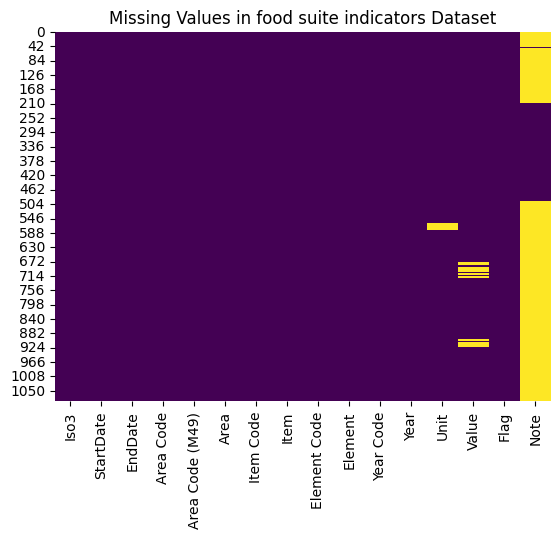

In [27]:
#We are checking for missing food suite values using viridis style
sns.heatmap(fs_indicators.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in food suite indicators Dataset')
plt.show()

In [28]:
print(fs_indicators.columns)

Index(['Iso3', 'StartDate', 'EndDate', 'Area Code', 'Area Code (M49)', 'Area',
       'Item Code', 'Item', 'Element Code', 'Element', 'Year Code', 'Year',
       'Unit', 'Value', 'Flag', 'Note'],
      dtype='object')


In [29]:
#Dropping the note column since majority of it is missing and does not necessarily serve any purpose
fs_indicators = fs_indicators.drop(columns=['Note', 'Area', 'StartDate', 'EndDate', 'Area Code', 'Area Code (M49)', 'Year Code', 'Element Code', 'Item Code', 'Flag'], errors='ignore')
fs_indicators

,Iso3,Item,Element,Year,Unit,Value
0,#country+code,#indicator+name,NaN,#date+year,#indicator+type,#indicator+value+num
1,LKA,Average dietary energy supply adequacy (percen...,Value,2002,%,102
2,LKA,Average dietary energy supply adequacy (percen...,Value,2003,%,103
3,LKA,Average dietary energy supply adequacy (percen...,Value,2004,%,103
4,LKA,Average dietary energy supply adequacy (percen...,Value,2005,%,104
...,...,...,...,...,...,...
1076,LKA,Average fat supply (g/cap/day) (3-year average),Value,2018,g/cap/d,44.2
1077,LKA,Average fat supply (g/cap/day) (3-year average),Value,2019,g/cap/d,45
1078,LKA,Average fat supply (g/cap/day) (3-year average),Value,2020,g/cap/d,46.3
1079,LKA,Average fat supply (g/cap/day) (3-year average),Value,2021,g/cap/d,47.6


In [30]:
# Remove rows with missing values in specified columns
fs_indicators = fs_indicators.dropna(subset=['Element', 'Iso3'])
fs_indicators

,Iso3,Item,Element,Year,Unit,Value
1,LKA,Average dietary energy supply adequacy (percen...,Value,2002,%,102
2,LKA,Average dietary energy supply adequacy (percen...,Value,2003,%,103
3,LKA,Average dietary energy supply adequacy (percen...,Value,2004,%,103
4,LKA,Average dietary energy supply adequacy (percen...,Value,2005,%,104
5,LKA,Average dietary energy supply adequacy (percen...,Value,2006,%,104
...,...,...,...,...,...,...
1076,LKA,Average fat supply (g/cap/day) (3-year average),Value,2018,g/cap/d,44.2
1077,LKA,Average fat supply (g/cap/day) (3-year average),Value,2019,g/cap/d,45
1078,LKA,Average fat supply (g/cap/day) (3-year average),Value,2020,g/cap/d,46.3
1079,LKA,Average fat supply (g/cap/day) (3-year average),Value,2021,g/cap/d,47.6


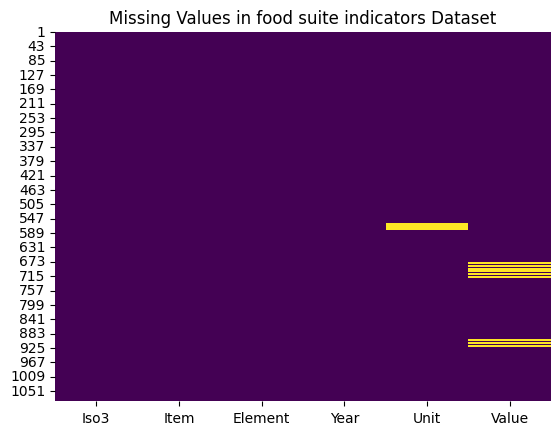

In [31]:
#We are checking for missing food suite values using viridis style
sns.heatmap(fs_indicators.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in food suite indicators Dataset')
plt.show()

In [32]:
# Remove rows where 'Item' is "Percentage of children under 5 years affected by wasting (percent)"
fs_indicators = fs_indicators[fs_indicators['Item'] != "Percentage of children under 5 years affected by wasting (percent)"]

fs_indicators = fs_indicators[fs_indicators['Item'] != "Number of children under 5 years affected by wasting (million)"]

fs_indicators = fs_indicators[fs_indicators['Item'] != "Prevalence of exclusive breastfeeding among infants 0-5 months of age (percent)"]

In [33]:
fs_indicators['Unit'] = fs_indicators['Unit'].fillna('No Unit')

In [34]:
fs_indicators.isnull().sum()

,0
Iso3,0
Item,0
Element,0
Year,0
Unit,0
Value,20


In [35]:
#Selecting only particular items

taken_items = [
    "Average protein supply (g/cap/day) (3-year average)",
    "Gross domestic product per capita, PPP, (constant 2017 international $)",
    "Number of people undernourished (million) (3-year average)",
    "Prevalence of severe food insecurity in the male adult population (percent) (3-year average)",
    "Prevalence of severe food insecurity in the female adult population (percent) (3-year average)",
    "Number of severely food insecure people (million) (3-year average)",
    "Number of severely food insecure male adults (million) (3-year average)",
    "Number of severely food insecure female adults (million) (3-year average)",
    "Political stability and absence of violence/terrorism (index)",
    "Percentage of population using safely managed drinking water services (percent)",
    "Percentage of population using at least basic drinking water services (percent)",
    "Number of obese adults (18 years and older) (million)",
    "Prevalence of low birthweight (percent)",
    "Number of newborns with low birthweight (million)"
]

fs_indicators = fs_indicators[fs_indicators['Item'].isin(taken_items)]

In [37]:
#Save the cleaned dataframe as a CSV
fs_indicators.to_csv("suite-of-food-security-indicators_lka-cleaned.csv",index=False)

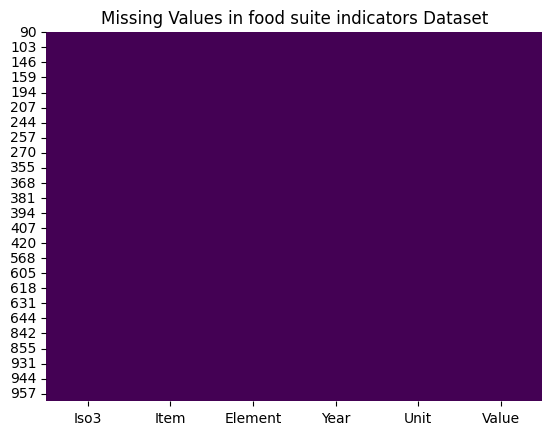

In [38]:
#Visualising a heatmap to identify missing cells
#We are checking for missing customer values using viridis style
sns.heatmap(fs_indicators.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in food suite indicators Dataset')
plt.show()